<a href="https://colab.research.google.com/github/Arhin-Eben/FUTURE_DS_01/blob/master/CustomerSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean the text
def clean_text(text):
    # Check if the text is a string before applying lower()
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
        return text
    else:
        # Handle non-string values (e.g., return empty string or NaN)
        return ''  # or return float('nan')

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Load the datasets
train_data = pd.read_csv('/content/train.ft.txt', sep='\t', header=None, names=['sentiment', 'text'])
test_data = pd.read_csv('/content/test.ft.txt', sep='\t', header=None, names=['sentiment', 'text'])

# --- Stage 1: Raw Data ---
print("Stage 1: Raw Data")
print(train_data.head())  # Display the first few rows of the raw data

# --- Stage 2: Data Cleaning ---
print("\nStage 2: Data Cleaning")

# Apply text cleaning to both datasets
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
test_data['cleaned_text'] = test_data['text'].apply(clean_text)

# Display the first few rows of the cleaned data
print(train_data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stage 1: Raw Data
                                           sentiment  text
0  __label__2 Stuning even for the non-gamer: Thi...   NaN
1  __label__2 The best soundtrack ever to anythin...   NaN
2  __label__2 Amazing!: This soundtrack is my fav...   NaN
3  __label__2 Excellent Soundtrack: I truly like ...   NaN
4  __label__2 Remember, Pull Your Jaw Off The Flo...   NaN

Stage 2: Data Cleaning
                                           sentiment  text cleaned_text
0  __label__2 Stuning even for the non-gamer: Thi...   NaN             
1  __label__2 The best soundtrack ever to anythin...   NaN             
2  __label__2 Amazing!: This soundtrack is my fav...   NaN             
3  __label__2 Excellent Soundtrack: I truly like ...   NaN             
4  __label__2 Remember, Pull Your Jaw Off The Flo...   NaN             


In [20]:
# --- Stage 3: Tokenization ---
print("\nStage 3: Tokenization")
train_data['tokens'] = train_data['cleaned_text'].apply(word_tokenize)
print(train_data[['cleaned_text', 'tokens']].head())  # Show cleaned text and tokens

# --- Stage 4: Stop Word Removal ---
print("\nStage 4: Stop Word Removal")
stop_words = set(stopwords.words('english'))
train_data['tokens_no_stopwords'] = train_data['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
print(train_data[['tokens', 'tokens_no_stopwords']].head())  # Show tokens before and after stop word removal

# --- Stage 5: Lemmatization ---
print("\nStage 5: Lemmatization")
lemmatizer = WordNetLemmatizer()
train_data['lemmatized_tokens'] = train_data['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
print(train_data[['tokens_no_stopwords', 'lemmatized_tokens']].head())  # Show tokens before and after lemmatization



Stage 3: Tokenization
  cleaned_text tokens
0                  []
1                  []
2                  []
3                  []
4                  []

Stage 4: Stop Word Removal
  tokens tokens_no_stopwords
0     []                  []
1     []                  []
2     []                  []
3     []                  []
4     []                  []

Stage 5: Lemmatization
  tokens_no_stopwords lemmatized_tokens
0                  []                []
1                  []                []
2                  []                []
3                  []                []
4                  []                []



Stage 6: Sentiment Analysis
  cleaned_text sentiment_label
0                      Neutral
1                      Neutral
2                      Neutral
3                      Neutral
4                      Neutral

Stage 7: Sentiment Distribution


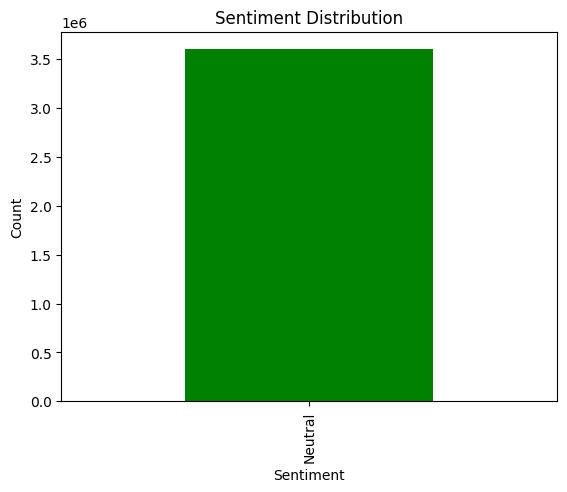

In [21]:
# --- Stage 6: Sentiment Analysis ---
print("\nStage 6: Sentiment Analysis")
train_data['sentiment_label'] = train_data['cleaned_text'].apply(analyze_sentiment)
print(train_data[['cleaned_text', 'sentiment_label']].head())  # Show cleaned text and sentiment labels

# --- Stage 7: Sentiment Distribution ---
print("\nStage 7: Sentiment Distribution")
sentiment_counts = train_data['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [23]:
# --- Stage 8: Word Cloud ---
print("\nStage 8: Word Cloud")
positive_words = ' '.join(train_data[train_data['sentiment_label'] == 'Positive']['cleaned_text'].tolist())

# Check if positive_words is empty
if len(positive_words.strip()) == 0:
    print("No positive words found to generate a word cloud.")
else:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Positive Reviews')
    plt.show()


Stage 8: Word Cloud
No positive words found to generate a word cloud.
